# Exploratory Data Analysis of India's official COVID-19 data

In [1]:
import json
import requests

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data source
Covid data in JSON format is obtained from this URL: [https://www.mohfw.gov.in/data/datanew.json](https://mohfw.gov.in/data/datanew.json)

Output data from this URL is a list of objects

In [2]:
covid_data_url = "https://www.mohfw.gov.in/data/datanew.json"

# Output data from this URL is JSON (List of objects)

In [3]:
response = requests.get(covid_data_url)

In [4]:
covid_data = json.loads(response.content)

In [5]:
df = pd.DataFrame.from_records(covid_data)

In [6]:
df.head(5)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
0,2,Andaman and Nicobar Islands,16,7510,7365,129,19,7516,7368,129,35
1,1,Andhra Pradesh,24708,1940096,1902256,13132,23570,1941724,1905000,13154,28
2,3,Arunachal Pradesh,4211,42820,38407,202,4260,43328,38865,203,12
3,4,Assam,17815,547283,524469,4999,17454,549080,526607,5019,18
4,5,Bihar,725,723945,713591,9629,680,723999,713689,9630,10


In [7]:
df.tail(5)

,sno,state_name,active,positive,cured,death,new_active,new_positive,new_cured,new_death,state_code
32,33,Tripura,4314,73901,68859,728,4391,74389,69269,729,16
33,35,Uttarakhand,623,341452,333473,7356,604,341486,333525,7357,05
34,36,Uttar Pradesh,1262,1707847,1683866,22719,1188,1707884,1683968,22728,09
35,37,West Bengal,13111,1518181,1487071,17999,12759,1518847,1488077,18011,19
36,11111,,421665,31144229,30308456,414108,406130,31174322,30353710,414482,


In [8]:
df.shape

(37, 11)

In [9]:
list_of_states = list(df['state_name'].unique())
print(f"Number of states: {len(list_of_states)}")
print(list_of_states)

Number of states: 37
['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra and Nagar Haveli and Daman and Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karanataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttarakhand', 'Uttar Pradesh', 'West Bengal', '']


In [10]:
df.drop(['sno', 'state_code'], axis=1, inplace=True) # Drop uninteresting columns
df.drop(['new_active', 'new_positive', 'new_cured', 'new_death'], axis=1, inplace=True) # Let's ignore the new* columns for now
df.drop(36, axis=0, inplace=True) # Drop uninteresting rows

In [11]:
df.dtypes

state_name    object
active        object
positive      object
cured         object
death         object
dtype: object

In [12]:
# Convert all columns except state_name into integers

all_columns = list(df.columns)
int_columns = list(filter(lambda x: x != 'state_name', all_columns))

In [13]:
for column in int_columns:
    df[column] = pd.to_numeric(df[column], downcast='integer')

In [14]:
df.dtypes

state_name    object
active         int32
positive       int32
cured          int32
death          int32
dtype: object

<AxesSubplot:>

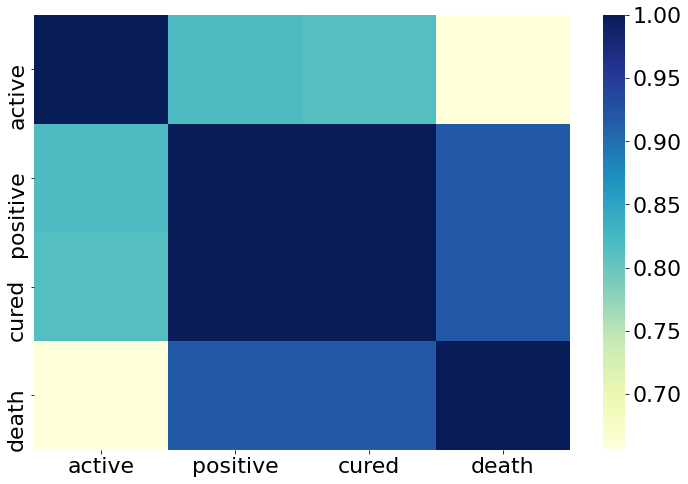

In [23]:
plt.rcParams['font.size'] = 22
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='YlGnBu')

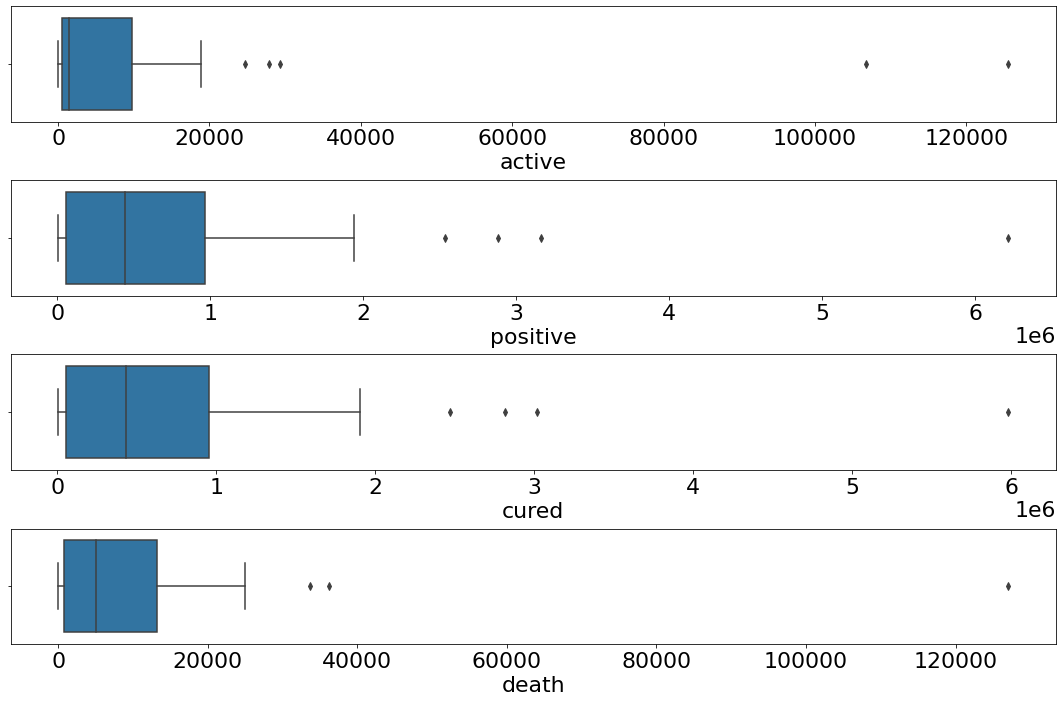

In [38]:
fig, axs = plt.subplots(len(int_columns))
fig.tight_layout()
for i in range(len(int_columns)):
    column = int_columns[i]
    sns.boxplot(ax=axs[i], x=df[column])

There seem to be outliers in all columns

In [17]:
df.sort_values(by='active', axis=0, ascending=False).head(5)

,state_name,active,positive,cured,death
16,Kerala,125535,3160937,3020052,15350
20,Maharashtra,106809,6214190,5980350,127031
15,Karanataka,29314,2883947,2818476,36157
30,Tamil Nadu,27897,2535402,2473781,33724
1,Andhra Pradesh,24708,1940096,1902256,13132


In [39]:
df.sort_values(by='positive', axis=0, ascending=False).head(5)

,state_name,active,positive,cured,death
20,Maharashtra,106809,6214190,5980350,127031
16,Kerala,125535,3160937,3020052,15350
15,Karanataka,29314,2883947,2818476,36157
30,Tamil Nadu,27897,2535402,2473781,33724
1,Andhra Pradesh,24708,1940096,1902256,13132


In [40]:
df.sort_values(by='cured', axis=0, ascending=False).head(5)

,state_name,active,positive,cured,death
20,Maharashtra,106809,6214190,5980350,127031
16,Kerala,125535,3160937,3020052,15350
15,Karanataka,29314,2883947,2818476,36157
30,Tamil Nadu,27897,2535402,2473781,33724
1,Andhra Pradesh,24708,1940096,1902256,13132


In [41]:
df.sort_values(by='death', axis=0, ascending=False).head(5)

,state_name,active,positive,cured,death
20,Maharashtra,106809,6214190,5980350,127031
15,Karanataka,29314,2883947,2818476,36157
30,Tamil Nadu,27897,2535402,2473781,33724
8,Delhi,592,1435529,1409910,25027
34,Uttar Pradesh,1262,1707847,1683866,22719
